# Example code for OSL Learning
We will use the

In [1]:
import torch

import matplotlib.pyplot as plt

from datasets.openml_datasets import OpenML_Dataset
from datasets.torch_datasets import Torch_Dataset
from utils.weakener import Weakener
from models.model import MLP
from utils.losses import PartialLoss,LBLoss,EMLoss,OSLCELoss,OSLBrierLoss
from utils.trainig_testing import train_model,evaluate_model,train_and_evaluate

The steps you might want to take for running the full 'weakening - learning - evaluating' experience
<ol>
<li> Loading the clean dataset: <code>Data = OpemML_Dataset('name')</code></li>
<li> Setting the Weakener class: <code>Weak = Weakener(Data.num_classes)</code></li>
<ol>
<li> Generate the mixing matrix: <code>WL.generate_M(model_class='pll')</code></li>
<li> Generate the weak labels <em>(z=index,w=one_hot)</em>: <code>z, w = WL.generate_weak(train_y)</code></li>
<ul style="list-style: none;">
 <li>Generating virtual label matrix or virtual labels is not necessary when training an OSL Learning algorithm as it only uses the weak labels</li>
</ul>
</ol>
<li>Generate the dataloaders (trainloader/testloader) for the dataset enhaced with the weak labels</li>
<ol>
<li> Include weak labels into the dataset: <code>Data.include_weak(Weak.w)</code></li>
<li> Generate the dataloaders: <code>trainloader, testloader = Data.get_dataloader()</code></li>
</ol>
<li> We create the mlp: <code>mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.5)</code></li>
</ol>

Fasten your seatbelt!

In [2]:
#Data = OpenML_Dataset('iris')
Data = Torch_Dataset('mnist')
train_x, train_y, test_x, test_y = Data.get_data()
# WL stores processes relative to the Weakening process
Weak = Weakener(Data.num_classes)
Weak.generate_M(model_class='pll')

In [3]:
z, w = Weak.generate_weak(train_y)

In [4]:
Data.include_weak(Weak.w)

In [5]:
trainloader, testloader = Data.get_dataloader()



In [6]:
mlp = MLP(Data.num_features,[Data.num_features],Data.num_classes,dropout_p=0.3)
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
loss_fn = OSLCELoss()

mlp,results = train_and_evaluate(mlp,trainloader,testloader,optimizer,loss_fn,num_epochs=10)


Epoch 1/10: Train Loss: 3.4704, Train Acc: 0.7980, Test Acc: 0.8931
Epoch 2/10: Train Loss: 0.4194, Train Acc: 0.8641, Test Acc: 0.9203
Epoch 3/10: Train Loss: 0.3165, Train Acc: 0.8782, Test Acc: 0.9251
Epoch 4/10: Train Loss: 0.3586, Train Acc: 0.8743, Test Acc: 0.9190
Epoch 5/10: Train Loss: 0.3129, Train Acc: 0.8857, Test Acc: 0.9177
Epoch 6/10: Train Loss: 0.2937, Train Acc: 0.8904, Test Acc: 0.9177
Epoch 7/10: Train Loss: 0.2785, Train Acc: 0.8950, Test Acc: 0.9295
Epoch 8/10: Train Loss: 0.2770, Train Acc: 0.8947, Test Acc: 0.9272
Epoch 9/10: Train Loss: 0.2592, Train Acc: 0.8956, Test Acc: 0.9335
Epoch 10/10: Train Loss: 0.2501, Train Acc: 0.8998, Test Acc: 0.9256


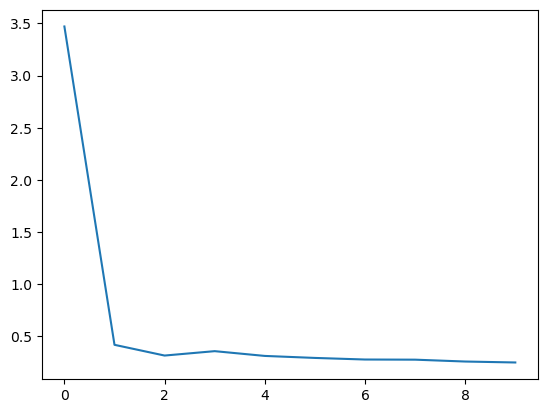

In [7]:
plt.plot(results['train_loss'])

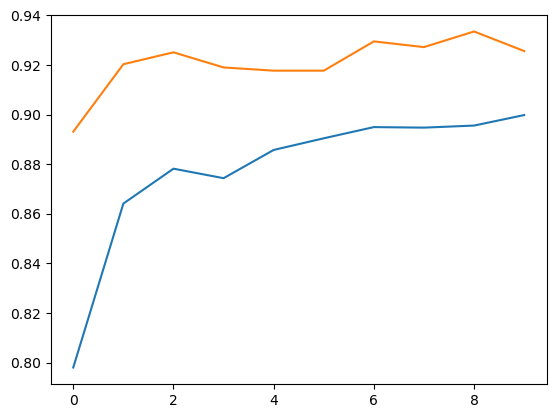

In [8]:
plt.plot(results['train_acc'])
plt.plot(results['test_acc'])